In [1]:
import pandas as pd

In [3]:
nnunet_path = "/home/juli/Downloads/to_share_with_julian/csv/newstats.csv"
sct_path = "/home/juli/Downloads/to_share_with_julian/csv/sct_stats.csv"
df_nnunet = pd.read_csv(nnunet_path)
df_sct = pd.read_csv(sct_path)

In [4]:
# Define volume bins and labels
bins = [3, 10, 50, 100, float('inf')]
labels = ['3-10', '10-50', '50-100', '>100']

# Create a new column for volume categories
df_nnunet['Volume category'] = pd.cut(df_nnunet['Object volume'], bins=bins, labels=labels, right=False)
df_sct['Volume category'] = pd.cut(df_sct['Object volume'], bins=bins, labels=labels, right=False)

# Group by volume category and count detected vs undetected lesions
grouped_volume_df_nnunet = df_nnunet.groupby('Volume category')['Detected flag'].value_counts(normalize=True).unstack().fillna(0) * 100
grouped_volume_df_sct = df_sct.groupby('Volume category')['Detected flag'].value_counts(normalize=True).unstack().fillna(0) * 100
# Rename columns for better clarity
grouped_volume_df_nnunet.columns = ['Undetected Lesions (%)', 'Detected Lesions (%)']
grouped_volume_df_sct.columns = ['Undetected Lesions (%)', 'Detected Lesions (%)']

# Display the result
print(grouped_volume_df_nnunet)

                 Undetected Lesions (%)  Detected Lesions (%)
Volume category                                              
3-10                          72.727273             27.272727
10-50                         27.814570             72.185430
50-100                         6.299213             93.700787
>100                           4.968944             95.031056


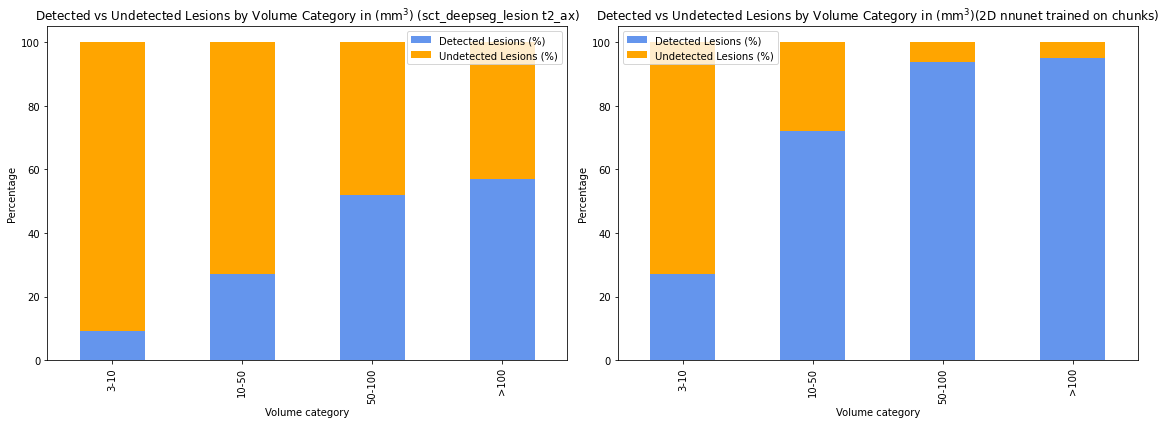

In [15]:
import matplotlib.pyplot as plt

grouped_df1 = grouped_volume_df_sct
grouped_df2 = grouped_volume_df_nnunet

# Assume df_plot1 and df_plot2 are your two dataframes
df_plot1 = grouped_df1[['Detected Lesions (%)', 'Undetected Lesions (%)']]
df_plot2 = grouped_df2[['Detected Lesions (%)', 'Undetected Lesions (%)']]

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# First plot (df_plot1)
df_plot1.plot(kind="bar", stacked=True, color=["cornflowerblue", "orange"], ax=axes[0])
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Volume category in (mm$^3$)")
axes[0].set_title("Detected vs Undetected Lesions (sct_deepseg_lesion t2_ax)")

# Second plot (df_plot2)
df_plot2.plot(kind="bar", stacked=True, color=["cornflowerblue", "orange"], ax=axes[1])
axes[1].set_ylabel("Percentage")
axes[1].set_xlabel("Volume category in (mm$^3$)")
axes[1].set_title("Detected vs Undetected Lesions (mm$^3$)(2D nnunet trained on chunks)")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [43]:
# Create DataFrame
df = pd.read_csv(path)

# Define volume bins and labels
bins = [3, 10, 50, 100, float('inf')]
labels = ['3-10', '10-50', '50-100', '>100']

# Create a new column for volume categories
df['Volume category'] = pd.cut(df['Object volume'], bins=bins, labels=labels, right=False)

# Group by volume category and count detected vs undetected lesions
grouped_volume_df = df.groupby('Volume category')['Detected flag'].value_counts(normalize=True).unstack().fillna(0) * 100

# Rename columns for better clarity
grouped_volume_df.columns = ['Undetected Lesions (%)', 'Detected Lesions (%)']

# Display the result
print(grouped_volume_df)

                 Undetected Lesions (%)  Detected Lesions (%)
Volume category                                              
3-10                          72.727273             27.272727
10-50                         27.814570             72.185430
50-100                         6.299213             93.700787
>100                           4.968944             95.031056


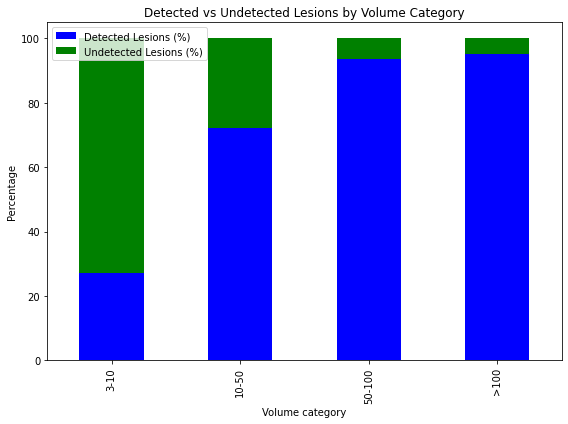

In [44]:
df_plot = grouped_volume_df
# switch second and third columns
df_plot = df_plot[['Detected Lesions (%)', 'Undetected Lesions (%)']]
# df_plot.set_index('Volume category', inplace=True)

# Create a bar plot
ax = df_plot.plot(kind="bar", stacked=True, color=["blue", "green"], figsize=(8,6))

# Set labels and title
ax.set_ylabel("Percentage")
ax.set_xlabel("Volume category")
ax.set_title("Detected vs Undetected Lesions by Volume Category")

# Show plot
plt.tight_layout()
plt.show()